<a href="https://colab.research.google.com/github/mojoyinkimberly/clustering_algorithms/blob/main/ClusteringLiverMalfunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing libraries**

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder,StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

**reading dataset into python environment**

In [77]:
discover_data = pd.read_csv("/content/discover_pattern.csv", sep =",")
discover_data

,85,92,45,27,31,0.0,1
0,85,64,59,32,23,0.0,2
1,86,54,33,16,54,0.0,2
2,91,78,34,24,36,0.0,2
3,87,70,12,28,10,0.0,2
4,98,55,13,17,17,0.0,2
...,...,...,...,...,...,...,...
339,99,75,26,24,41,12.0,1
340,96,69,53,43,203,12.0,2
341,98,77,55,35,89,15.0,1
342,91,68,27,26,14,16.0,1


**renaming columns**

In [78]:
disc_data=discover_data.rename(columns={'85':'Mean Corpuscular Volume','92':'Alkaline Phosphotase','45':'Alamine Aminotransferase','27':'Aspartate Aminotransferase','31':'Gamma-Glutamyl Transpeptidase'})
disc_data

,Mean Corpuscular Volume,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Gamma-Glutamyl Transpeptidase,0.0,1
0,85,64,59,32,23,0.0,2
1,86,54,33,16,54,0.0,2
2,91,78,34,24,36,0.0,2
3,87,70,12,28,10,0.0,2
4,98,55,13,17,17,0.0,2
...,...,...,...,...,...,...,...
339,99,75,26,24,41,12.0,1
340,96,69,53,43,203,12.0,2
341,98,77,55,35,89,15.0,1
342,91,68,27,26,14,16.0,1


**dropping irrelevant columns**

In [79]:
disco_data = disc_data.drop(columns= ['0.0','1'])

**checking for missing values**

In [80]:
disco_data.isna().sum()

Mean Corpuscular Volume          0
Alkaline Phosphotase             0
Alamine Aminotransferase         0
Aspartate Aminotransferase       0
Gamma-Glutamyl Transpeptidase    0
dtype: int64

**checking for outliers using boxplots**

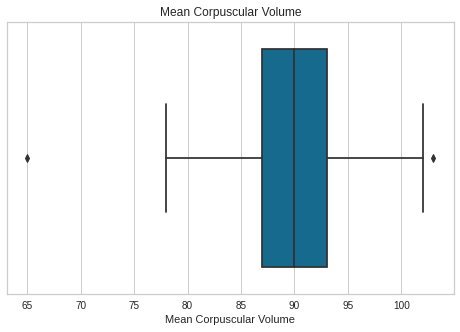

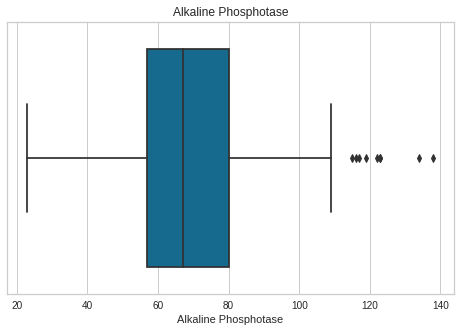

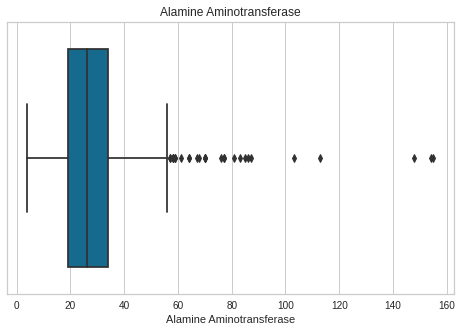

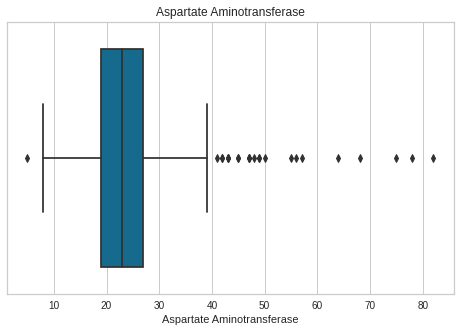

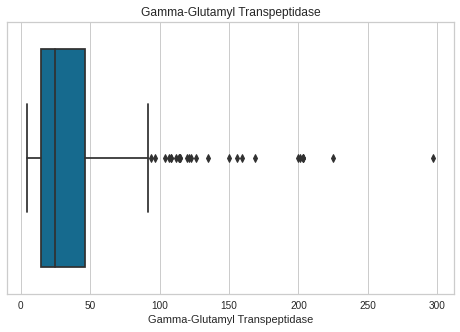

In [81]:
for column in ['Mean Corpuscular Volume', 'Alkaline Phosphotase', 'Alamine Aminotransferase', 'Aspartate Aminotransferase', 'Gamma-Glutamyl Transpeptidase']:
  plt.figure(figsize=(8, 5))
  sns.boxplot(data = disco_data, x = column)
  plt.title(column)
  plt.show()


**normalize dataset**

In [82]:
scaler = StandardScaler()
normalized = pd.DataFrame(scaler.fit_transform(disco_data))

Text(0.5, 1.0, 'Elbow curve')

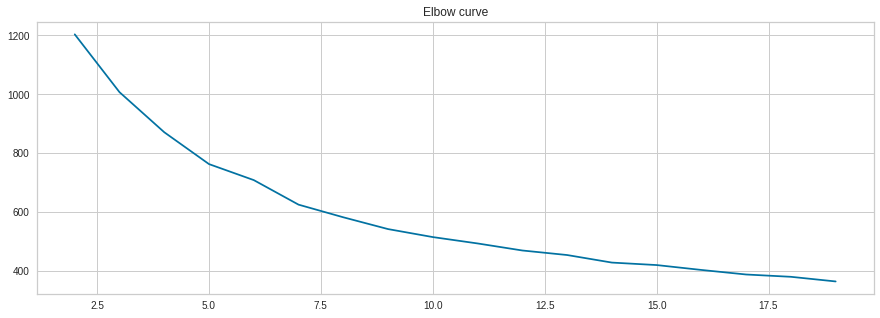

In [83]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normalized)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

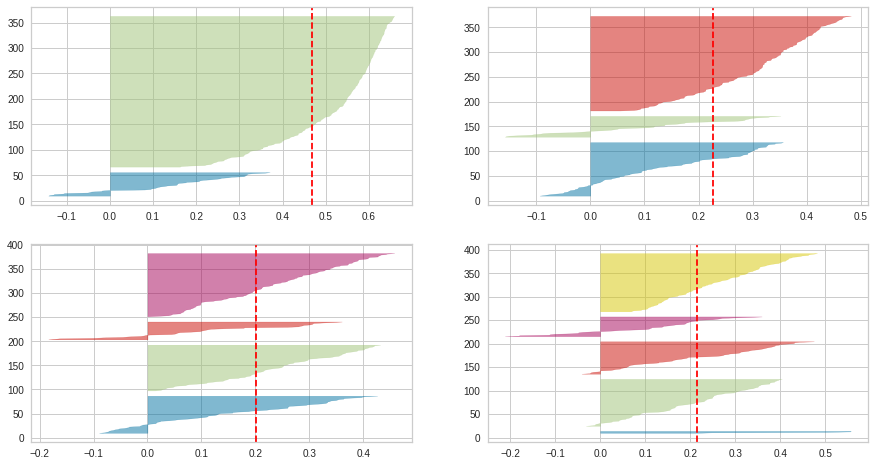

In [84]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(normalized)

In [92]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_output = kmeans.fit(normalized)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [93]:
normalized['label'] = kmeans_output.labels_

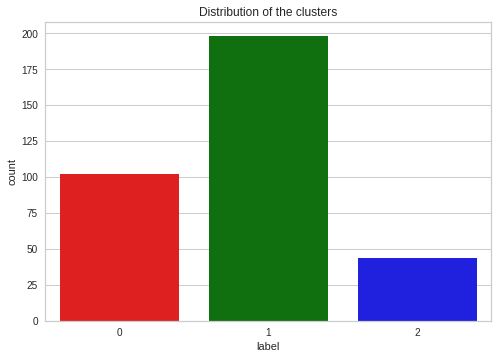

In [89]:
pal = ["red", "green", "blue", "pink"]
pl = sns.countplot(x=normalized['label'], palette=pal)
pl.set_title("Distribution of the clusters")
plt.show()

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan_output= dbscan.fit(normalized)
dbscan_output_= dbscan.fit_predict(normalized)

In [139]:
normalized['labels_'] = dbscan_output.labels_

In [140]:
normalized

,0,1,2,3,4,label,labels,labels_
0,-1.165577,-0.317075,1.468817,0.731677,-0.389916,1,0,0
1,-0.940319,-0.863263,0.135237,-0.858197,0.399840,1,0,0
2,0.185968,0.447588,0.186528,-0.063260,-0.058728,0,0,0
3,-0.715062,0.010638,-0.941886,0.334209,-0.721104,1,0,0
4,1.762771,-0.808644,-0.890594,-0.758830,-0.542772,1,0,0
...,...,...,...,...,...,...,...,...
339,1.988028,0.283732,-0.223804,-0.063260,0.068652,0,0,0
340,1.312256,-0.043981,1.161068,1.824716,4.195762,2,1,0
341,1.762771,0.392969,1.263651,1.029779,1.291499,2,0,0
342,0.185968,-0.098600,-0.172513,0.135474,-0.619200,1,0,0


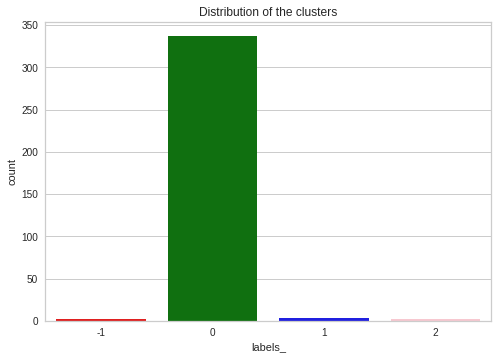

In [137]:
pal = ["red", "green", "blue", "pink"]
pl = sns.countplot(x=normalized['labels_'], palette=pal)
pl.set_title("Distribution of the clusters")
plt.show()